<a href="https://colab.research.google.com/github/rahulkumar1m/Machine-Learning-Concepts-Implementation/blob/master/AutoEncoder/Autoencoder_with_mnist_and_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoencoer with MNIST dataset and Pytorch
Here, we are going to train an Autoencoder with Conv2d layer for encoder and decoder to reconstruct MNIST dataset.


In [0]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import warnings

In [0]:
# Hiding warnings for cleaner display
warnings.filterwarnings('ignore')

%matplotlib inline

Torchvision provides a convenient way to load MNIST dataset.



In [0]:
# Importing MNIST dataset
mnist_data = datasets.MNIST('data', 
                            train=True, 
                            download=True, 
                            transform=transforms.ToTensor())
mnist_data = list(mnist_data)[:2000]

Define a simple autoencoer class with Conv2D for encoder and decoer.

In [0]:
# Defining a class for AutoEncoder.
class AE(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5),
            nn.ReLU(True),
            nn.Conv2d(6, 16, kernel_size=5),
            nn.ReLU(True))
        self.decoder = nn.Sequential(             
            nn.ConvTranspose2d(16, 6, kernel_size=5),
            nn.ReLU(True),
            nn.ConvTranspose2d(6, 3, kernel_size=5),
            nn.ReLU(True))

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [0]:
# check if we have a gpu env
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#initialize the autoencoer model
model = AE().to(device)

# Model Training

In [0]:
# main component for model training, default 10 epochs with 256 batch size and 1e-3 learning rate
def train(model, epochs=10, batch_size=256, learning_rate=1e-3):
    torch.manual_seed(1)
    criterion = nn.MSELoss() # mean square error loss
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    train_loader = torch.utils.data.DataLoader(mnist_data, 
                                               batch_size=batch_size, 
                                               shuffle=True)
    intermediate_outputs = [] # here we save the itermidate outputs for future visualization
    for epoch in range(epochs):
        for data in train_loader:
            img, _ = data
            recon = model(img.to(device))
            loss = criterion(recon, img.to(device))
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        print('epoch:{}, MSELoss:{:.3f}'.format(epoch+1, float(loss)))
        intermediate_outputs.append((epoch, img, recon),)
    return intermediate_outputs

In [7]:
# Let's train our AutoEncoder model.
intermediate_outputs = train(model)

epoch:1, MSELoss:0.085
epoch:2, MSELoss:0.055
epoch:3, MSELoss:0.041
epoch:4, MSELoss:0.030
epoch:5, MSELoss:0.018
epoch:6, MSELoss:0.014
epoch:7, MSELoss:0.011
epoch:8, MSELoss:0.010
epoch:9, MSELoss:0.008
epoch:10, MSELoss:0.007


# Test MNIST dataset visulization

<Figure size 1440x288 with 0 Axes>

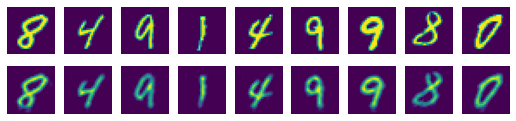

In [8]:
test_mnist_data = datasets.MNIST('data', train=False, download=True, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_mnist_data, 
                                               batch_size=10, 
                                               shuffle=True)
outputs = []
with torch.no_grad():
    for data in test_loader:
        img, _ = data
        recon = model(img.to(device))
        outputs.append((img.to(device), recon),)
        break
number = 10
plt.figure(figsize=(20, 4))
original_imgs = outputs[0][0].cpu().detach().numpy()
reconstruction = outputs[0][1].cpu().detach().numpy()
plt.figure(figsize=(9, 2))
for i, item in enumerate(original_imgs):
    plt.subplot(2, 9, i+1)
    plt.imshow(item[0])
    plt.axis('off')
for i, item in enumerate(reconstruction):
    if i >= 9: break
    plt.subplot(2, 9, 9+i+1)
    plt.imshow(item[0])
    plt.axis('off')

# Intermidate results visulization

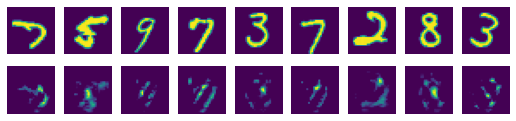

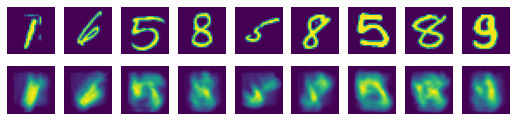

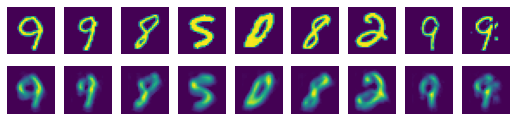

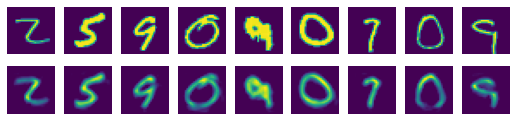

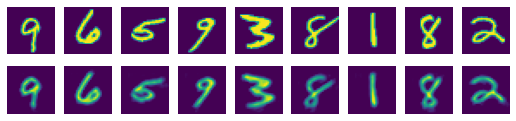

In [9]:
for k in range(0, 10, 2):
    plt.figure(figsize=(9, 2))
    original_imgs = intermediate_outputs[k][1].detach().numpy()
    reconstruction = intermediate_outputs[k][2].cpu().detach().numpy()
    for i, item in enumerate(original_imgs):
        if i >= 9: break
        plt.subplot(2, 9, i+1)
        plt.imshow(item[0])
        plt.axis('off')
        
    for i, item in enumerate(reconstruction):
        if i >= 9: break
        plt.subplot(2, 9, 9+i+1)
        plt.imshow(item[0])
        plt.axis('off')